## Cooling Coffee

Suppose that you are given an 8 ounce cup of coffee at 90°C and a 1 ounce container of cream at 20°C. You have learned from bitter experience that the hottest coffee you can drink comfortably is 60°C.  Assuming that you take cream in your coffee, and that you would like to start drinking as soon as possible, how long you should wait before adding the cream so that the coffee is 60°C?

To answer this question, you have to model the cooling process of a hot liquid in air and the mixing of liquids at different temperatures.

Hot coffee transfers heat to the environment by conduction, radiation, and evaporative cooling. Quantifying these effects individually would be challenging and unnecessary to answer the question as posed.

As a simplification, we can use Newton’s Law of Cooling :
\begin{equation}
    \frac{dy}{dt} = −r(y − T)
\end{equation}
where y is the temperature of the coffee as a function of time and dy/dt is its time derivative; T is the temperature of the environment, which is a constant in this case (20°C), and r is a parameter (also constant) that characterizes the rate of heat transfer. Let’s assume that r = 0.001 1/s.

In general, the final temperature of a mixture depends on the specific heat of the two liquids. But if we make the simplifying assumption that coffee and cream have the same density and specific heat, then the mixed temperature, ymix, is just a volume-weighed average 

 <pre>ymix = (v1*y1 + v2*y2)/(v1 + v2)</pre>
where v1 and v2 are the volumes of the liquids, and y1 and y2 are their temperatures.



Some Preliminaries:
Load modules

In [2]:
from numpy import linspace,log,exp,sin,cos,sqrt,pi,e
from scipy.optimize import brentq
from scipy.integrate import odeint

Fill in parameters of problem:

In [3]:
# set the temperatures in °C
HotCoffeeTemp = 100
CreamTemp = 20
CoolCoffee = 60 # Drinkable temperature
RoomTemp = 20

# set the volumes in oz
CoffeeVol = 8 
CreamVol = 1

# newton cooling rate
r = 0.001

1) create a function called rate_func  that takes inputs t and y and computes rate_func(t,y) based on the above cooling rate formula, where y is the temperature of the coffee at a particular point in time. Notice that in this case rate_func does not actually depend on t; nevertheless, your function has to take t as the first input argument in order to work with ode45. You need to add the relevant parameters in the sub function from above.

In [4]:
def rate_func(t,y):
    # This function specifies the right-hand-side of the newtonian
    # cooling differential equation. We will use it later in ode45
    global RoomTemp, r
    rate = -r * (y - RoomTemp)
    return rate

Call **odeint** like this:<br>

> odeint(func, y0, t_array, tfirst=False)

**odeint** solves the ode dy/dt=func(t,y) at the values of t specified in the array given in third input arguement, t_array.<br>
The first value of t_array must correpond to the initial condition. If you only want solution at a single final time, say 90 seconds, giving 
>t_array=[0, 90] 

as the input array returns only the initial and final values of the solution.

In [5]:
# What's the cooling rate for 90°C Coffee?
rate_func(0,90)

-0.07

In [6]:
# Get values a t=0 and t=90 (ie [0, 90])
odeint(rate_func, 90, [0,90], tfirst=True)

array([[90.        ],
       [83.97518406]])

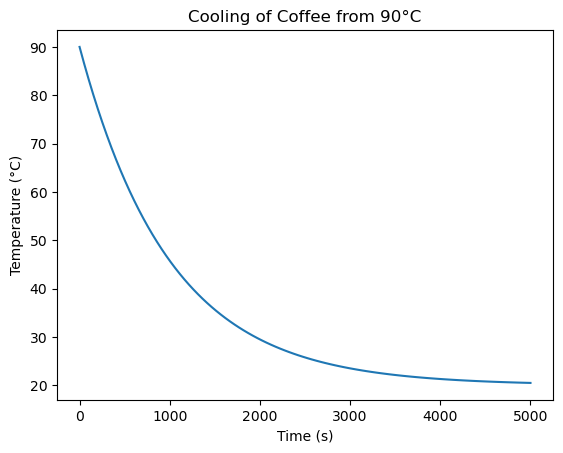

In [7]:
# Get 10 values over first 5000 seconds
time = linspace(0,5000,100)
Temp = odeint(rate_func, 90, time, tfirst=True)
# try plotting
plot(time, Temp)
xlabel('Time (s)')
ylabel('Temperature (°C)')
title('Cooling of Coffee from 90°C')
show()

2) Write a function called mix_func that computes the temperature of a mixture of two liquids. It needs the volumes and temperatures of the liquids and returns the temperature of the mixture. Add code to coffee to test mix_func.  

In [8]:
def mix_func(V1,T1,V2,T2):
    # Calculates the final temperature of two liquids after they have been
    # mixed based upon the initial temperature and volume of each individual liquid.
    # Function is passed:
    # V1, initial Volume of liquid one
    # T1, initial temperature of liquid one
    # V2, initial Volume of liquid two
    # T2, initial temperature of liquid two
    # Tmix, the temperature of the mixture

    Tmix = ((V1*T1) + (V2*T2))/(V1 + V2)
    return Tmix

Test your mixing function by trying different temperatures and volumes

In [9]:
v1 = 10
v2 = 20
t1 = 100
t2 = 150
mix_func(v1,t1, v2,t2)

133.33333333333334

3) These two functions model the two processes in the problem. Now add another function that calls odeint and returns the temperature of the coffee after waiting a specified time, t, and mixing in the cream. Test this function to get the temperature after 60 minutes of cooling. For testing, plot the temperature for 60 minutes and confirm that the coffee cools quickly at first, then more slowly, reaches room temperature (approximately) after about an hour, then cools . You now have a function with a single input time and single output temperature

In [10]:
def CoffeeTemp(t):
    # This function returns the temperature of the coffee after cooling
    # for t seconds and mixing with cream. It models the physical
    # process in the problem, first cooling then mixing.

    # first let the coffee cool for t seconds
    TT = odeint(rate_func, HotCoffeeTemp, [0,t], tfirst=True) # fill in arguments
    Temp = TT[-1] # the final value in TT is the temperature after cooling for t seconds

    # second mix cream with coffee to get final temperature using mix_func
    Temp = mix_func(CoffeeVol,Temp, CreamVol,CreamTemp)
    
    return Temp

4) Test your sub functions with different amounts of time; print the temperature of the coffee after mixing.

How would you model the situation of mixing the cream first then letting the coffee cool?



In [11]:
# Testing 1 2 3 
CoffeeTemp(1000)

array([46.16031688])

**At this point, despite all the code you've written, you basically just a simple function: temp = coffeetemp(t), that gives the temperature of the coffee after a time t, including the cooling and mixing processes.**

6) Use brentq to find the time t that results in the temperature of the coffee after cooling and mixing to be 60°C (i.e. find t such that coffeetemp(t) returns a value of 60°C. This will require writing a new function that calls CoffeeTemp(t) and returns the difference to the desired temperature. You are not trying to find the roots of coffeetemp(t), but of a the difference function between coffeetemp(t) and 60°C. Use your physical intuition to come up with brackets [tmin,tmax] -- the coffee will clearly take more than tmin seconds but fewer than tmax seconds. Note that the calculation fails for tmin=0, so use something else.

In [12]:
def TempDiff(t):
  # difference between temperature of coffee and desired temperature
  diff = CoffeeTemp(t) - CoolCoffee
  return diff

In [13]:
TempDiff(1000)

array([-13.83968312])

Get the solution by filling in the blanks

In [14]:
CoolTime = brentq(TempDiff,10,20*60)
print(CoolTime)

575.364168318661


Formatted printout

In [15]:
print('If you start with ',round(CoffeeVol),'oz of coffee at ',round(HotCoffeeTemp,3),'deg-C')
print('mix in ',round(CreamVol),'oz of cream at ', 
    round(CreamTemp),'deg-C ',
    'and wait ',round(CoolTime/60,2), 'minutes')
print('then your coffee will be at the ideal temperature of ',round(CoolCoffee,3),'deg-C')


If you start with  8 oz of coffee at  100 deg-C
mix in  1 oz of cream at  20 deg-C  and wait  9.59 minutes
then your coffee will be at the ideal temperature of  60 deg-C
